### 215. Kth Largest Element in an Array

In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        heap = []
        heapify(heap)

        for n in nums:
            heappush(heap, -n)

        for i in range(k-1):
            heappop(heap)

        return -heap[0]

- We are using the **Heap** implementation from the library `heapq` to solve this problem.
- `heapify` returns a **MinHeap**, so we have to insert negated values for it to act like a **MaxHeap**.
- After converting `nums` to a `heap`, we use the `heappop` method to remove the `k` largest values from the `heap`, and return the largest value, `heap[0]`.

### 295. Find Median from Data Stream

In [ ]:
class MedianFinder:
    def __init__(self):
        self.nums = []
        
    def addNum(self, num: int) -> None:
        bisect.insort(self.nums, num)
        
    def findMedian(self) -> float:
        m = len(self.nums) // 2
        return (self.nums[m] + self.nums[m-1])/2 if len(self.nums) % 2 == 0 else self.nums[m]
        

# Your MedianFinder object will be instantiated and called as such:
# obj = MedianFinder()
# obj.addNum(num)
# param_2 = obj.findMedian()

- Sometimes using Python really feels like cheating...
- There is a reason why this is rated as a hard problem, and I believe it has to do with implementing `addNum()` in an efficient manner while still being able to find the median, but `bisect.insort()` is just too good.
- I think what they expected you to do here was to use heaps in your solution.

### 355. Design Twitter

In [ ]:
class Twitter:
    def __init__(self):
        self.posts = []
        self.follows = defaultdict(set)
        
    def postTweet(self, userId: int, tweetId: int) -> None:
        self.posts.append( (userId, tweetId) )
        
    def getNewsFeed(self, userId: int) -> List[int]:
        newsfeed = []
        offset = 0
        while len(newsfeed) < 10:
            try:
                recentpost = self.posts[-1 -offset]
                if recentpost[0] in self.follows[userId] or recentpost[0] == userId:
                    newsfeed.append( recentpost[1] )
            except IndexError:
                    break
            offset += 1
        return newsfeed

    def follow(self, followerId: int, followeeId: int) -> None:
        self.follows[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.follows[followerId]:
            self.follows[followerId].remove(followeeId)


# Your Twitter object will be instantiated and called as such:
# obj = Twitter()
# obj.postTweet(userId,tweetId)
# param_2 = obj.getNewsFeed(userId)
# obj.follow(followerId,followeeId)
# obj.unfollow(followerId,followeeId)

- Looking at the problem description, I was a bit apprehensive, but it turned out to not be that hard.
- We use a list to keep track of all `posts` and a dictionary of sets, `follows`, to keep track of the follower relationships.
- To retrieve the `newsfeed`, we simply collect `posts`, starting at the rightmost element, until we have either accumulated ten posts or iterated over all `posts`.
- We also have to ensure that we collect only posts from the followees of the user or the user himself.

### 621. Task Scheduler

In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        d = defaultdict(int)
        for t in tasks:
            d[t] += 1
        pq = list( dict(sorted(d.items(), key=lambda x: x[1])).keys() )


        offset = 0
        res = 0
        while tasks:
            try:
                currentTask = pq[-1 -offset]
                #print(f'prioQ = {pq}  currentTask = {currentTask} (pq[{-1 -offset}])  tasks = {tasks}  [{res}]')
                tasks.remove( currentTask )
                if d[currentTask] > 1: d[currentTask] -= 1 
                else: d.pop(currentTask)
            except IndexError:
                #print(f"idling for one round  [{res}]")
                pass
            
            # reset the offset to 0 when it reaches n and also sort the priority queue again
            if n == 0 or (offset > 0 and offset % n == 0):
                offset = -1  # set to -1 because it gets incremented a few lines down
                pq = list( dict(sorted(d.items(), key=lambda x: x[1])).keys() ) 

            offset += 1
            res += 1

        return res

- I am not too happy with this solution because it is not quite as efficient as it could be due to the frequent sorting that I perform on the priority queue, `pq`.
- How it works is that we put the `tasks` into a priority queue sorted by the frequency of the specific tasks.
- We then remove the element in `pq` at the position of the current `offset` from `tasks` until there are no tasks left.
- We reset the `offset` to `0` whenever  it reaches `n` and sort the priority queue `pq`, again.
- It is best understood how we take the `offset` into account via the following graphic.

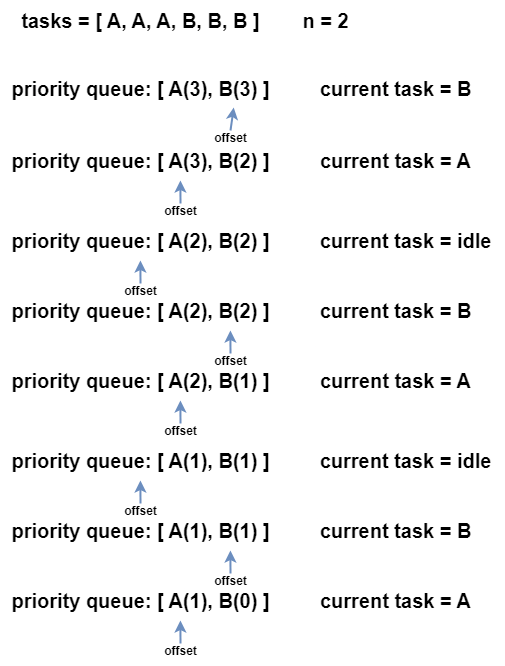

### 703. Kth Largest Element in a Stream

In [ ]:
class KthLargest:
    def __init__(self, k: int, nums: List[int]):
        self.nums = sorted(nums)
        self.k = k
        
    def add(self, val: int) -> int:
        bisect.insort(self.nums, val)
        return self.nums[-self.k]
        

# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

- As far as I am aware, my solution utilizes neither a heap nor a priority queue.
- I should probably come up with another solution that makes use of them.

### 767. Reorganize String

In [ ]:
class Solution:
    def reorganizeString(self, s: str) -> str:
        c = collections.Counter(s)
        l = [t[0] for t in c.most_common(2)]
        
        res = ""
        while l:
            if res and res[-1] == l[0]: return ""
            res += f"{l[0]}{l[1]}" if len(l) == 2 else f"{l[0]}"
            c.subtract(l)
            l = [t[0] for t in c.most_common(2) if t[1] > 0]
        return res

- This problem is very similar to *621. Task Scheduler* in that the letters of the string could be interpreted as tasks, and the cooldown for each task is 1 round.
- All that is left to do then is to append the most frequent task and the second most frequent task to the string until there are no more tasks left.

### 973. K Closest Points to Origin

In [ ]:
class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        s_points = sorted(points, key=lambda p: p[0]**2 + p[1]**2)
        return s_points[:k]

- I will also add a solution for this that uses a priority queue a bit later on.
- What I have done here is sort the given `points` by the square of their euclidian distance to the origin, and then I return the first `k` elements.

### 1046. Last Stone Weight

In [ ]:
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        s_stones = sorted(stones)

        while len(s_stones) > 1:
            stone1 = s_stones.pop()
            stone2 = s_stones.pop()
            if stone1 > stone2:
                stones.remove(stone2)
                i = stones.index(stone1)
                stones[i] = stone1-stone2
                bisect.insort(s_stones, stones[i])
            elif stone1 == stone2:
                stones.remove(stone1)
                stones.remove(stone2)

        return stones[0] if len(stones) == 1 else 0

- The way this works is that we first sort the list of `stones` and store the sorted list in `s_stones`, which we will treat as some sort of **priority queue**.
- Then we iterate over `s_stones` as long as it contains more than one element, and we `pop` the two heaviest stones, `stone1` and `stone2`, from the priority queue.
- If the stones are not of equal weight, we `remove` the lighter stone, `stone2`, from `stones` and update the value of the heavier one. It is also important to note that we reinserted `stone1` into the priority queue because we did not remove it from `stones`.
- Lastly, if the stones are of equal weight, we simply `remove` both of them from `stones`.